In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import classification_report

In [6]:
fs=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fs.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32') 

In [9]:
X_train[0].shape

(28, 28)

In [10]:
re=784
X_train=X_train.reshape(60000,re) 
X_test =X_test.reshape(10000,re) 

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
Y_train=tf.keras.utils.to_categorical(Y_train, 10) 

In [13]:
#SGD

In [14]:
model1=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model1=model1.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.8693 - accuracy: 0.7025 - val_loss: 0.6383 - val_accuracy: 0.7652
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5623 - accuracy: 0.8050 - val_loss: 0.5320 - val_accuracy: 0.8137
Epoch 3/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5033 - accuracy: 0.8250 - val_loss: 0.4987 - val_accuracy: 0.8262
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4744 - accuracy: 0.8353 - val_loss: 0.4813 - val_accuracy: 0.8309
Epoch 5/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4546 - accuracy: 0.8418 - val_loss: 0.4480 - val_accuracy: 0.8432
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4399 - accuracy: 0.8443 - val_loss: 0.4418 - val_accuracy: 0.8471
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4266 - accuracy: 0.8500 - val_loss: 0.4300 - val_accur

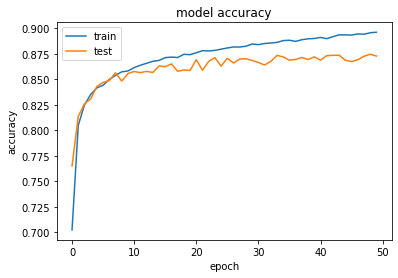

In [17]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

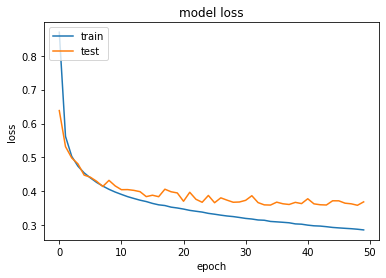

In [18]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
Y_pred1=model1.predict(X_test)
Y_pred1=Y_pred1.argmax(axis=1)
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.74      0.80      0.77      1000
           3       0.87      0.85      0.86      1000
           4       0.72      0.85      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.75      0.56      0.64      1000
           7       0.94      0.93      0.94      1000
           8       0.96      0.95      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [20]:
#mini batch

In [21]:
model2=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model2=model2.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 6s 9ms/step - loss: 1.1314 - accuracy: 0.6213 - val_loss: 0.7302 - val_accuracy: 0.7474
Epoch 2/50
750/750 [==============================] - 5s 7ms/step - loss: 0.6428 - accuracy: 0.7785 - val_loss: 0.5779 - val_accuracy: 0.7991
Epoch 3/50
750/750 [==============================] - 5s 7ms/step - loss: 0.5513 - accuracy: 0.8106 - val_loss: 0.5299 - val_accuracy: 0.8150
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.5107 - accuracy: 0.8220 - val_loss: 0.4974 - val_accuracy: 0.8244
Epoch 5/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4863 - accuracy: 0.8295 - val_loss: 0.4962 - val_accuracy: 0.8192
Epoch 6/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4686 - accuracy: 0.8358 - val_loss: 0.4724 - val_accuracy: 0.8363
Epoch 7/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4550 - accuracy: 0.8415 - val_loss: 0.4606 - val_accuracy: 0.8383
Epoch 

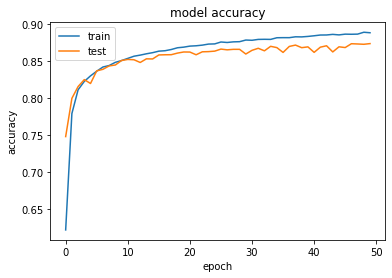

In [23]:
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

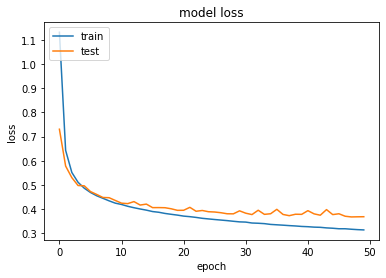

In [24]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [25]:
Y_pred2=model2.predict(X_test)
Y_pred2=Y_pred2.argmax(axis=1)
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.77      0.76      1000
           3       0.84      0.89      0.86      1000
           4       0.79      0.76      0.77      1000
           5       0.96      0.94      0.95      1000
           6       0.65      0.66      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.94      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [26]:
#adam

In [27]:
model3=tf.keras.Sequential([
      tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(40,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model3=model3.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 6s 7ms/step - loss: 0.6523 - accuracy: 0.7731 - val_loss: 0.4874 - val_accuracy: 0.8293
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4381 - accuracy: 0.8457 - val_loss: 0.4226 - val_accuracy: 0.8490
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4047 - accuracy: 0.8571 - val_loss: 0.4046 - val_accuracy: 0.8560
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3821 - accuracy: 0.8639 - val_loss: 0.3920 - val_accuracy: 0.8614
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3641 - accuracy: 0.8705 - val_loss: 0.3771 - val_accuracy: 0.8678
Epoch 6/50
750/750 [==============================] - 5s 7ms/step - loss: 0.3499 - accuracy: 0.8751 - val_loss: 0.3663 - val_accuracy: 0.8698
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3426 - accuracy: 0.8762 - val_loss: 0.3588 - val_accuracy: 0.8739
Epoch 

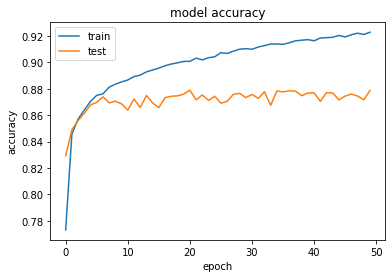

In [29]:
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

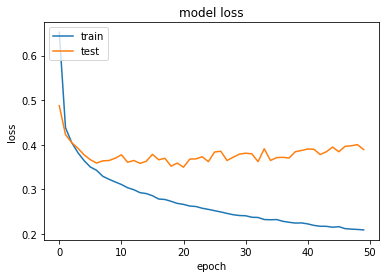

In [30]:
plt.plot(trained_model3.history['loss'])
plt.plot(trained_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
Y_pred3=model3.predict(X_test)
Y_pred3=Y_pred3.argmax(axis=1)
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.76      0.78      1000
           3       0.86      0.89      0.87      1000
           4       0.77      0.84      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.64      0.69      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.95      0.95      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [32]:
#multiple neuron

In [33]:
model4=tf.keras.Sequential([
      tf.keras.layers.Dense(50,input_shape=(784,),activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [34]:
model4.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model4=model4.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 7s 9ms/step - loss: 0.5641 - accuracy: 0.8043 - val_loss: 0.4610 - val_accuracy: 0.8356
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4071 - accuracy: 0.8527 - val_loss: 0.3937 - val_accuracy: 0.8573
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3630 - accuracy: 0.8676 - val_loss: 0.3641 - val_accuracy: 0.8696
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.3396 - accuracy: 0.8771 - val_loss: 0.3542 - val_accuracy: 0.8742
Epoch 5/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3222 - accuracy: 0.8816 - val_loss: 0.3527 - val_accuracy: 0.8742
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3050 - accuracy: 0.8865 - val_loss: 0.3525 - val_accuracy: 0.8733
Epoch 7/50
750/750 [==============================] - 7s 9ms/step - loss: 0.2959 - accuracy: 0.8893 - val_loss: 0.4186 - val_accuracy: 0.8470
Epoch 

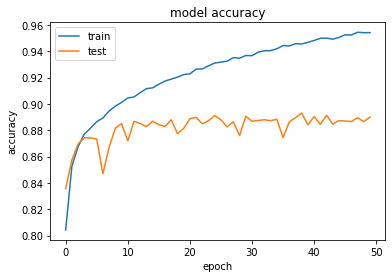

In [35]:
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

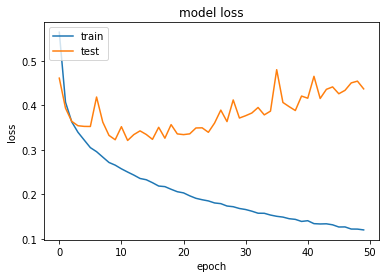

In [36]:
plt.plot(trained_model4.history['loss'])
plt.plot(trained_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
Y_pred4=model4.predict(X_test)
Y_pred4=Y_pred4.argmax(axis=1)
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.76      0.85      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.76      0.63      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [38]:
#RMS PROP

In [39]:
model5=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_13 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [40]:
model5.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model5=model5.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5957 - accuracy: 0.7934 - val_loss: 0.4502 - val_accuracy: 0.8416
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4272 - accuracy: 0.8457 - val_loss: 0.4168 - val_accuracy: 0.8492
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3890 - accuracy: 0.8593 - val_loss: 0.4046 - val_accuracy: 0.8565
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3664 - accuracy: 0.8667 - val_loss: 0.3865 - val_accuracy: 0.8623
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3535 - accuracy: 0.8720 - val_loss: 0.3912 - val_accuracy: 0.8650
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3423 - accuracy: 0.8758 - val_loss: 0.3879 - val_accuracy: 0.8628
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3356 - accuracy: 0.8787 - val_loss: 0.3814 - val_accuracy:

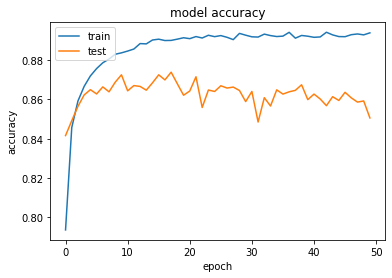

In [41]:
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

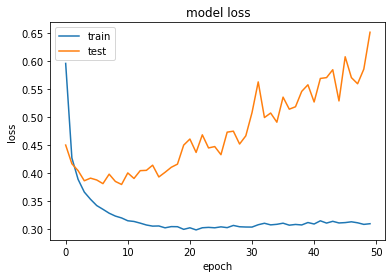

In [42]:
plt.plot(trained_model5.history['loss'])
plt.plot(trained_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
Y_pred5=model5.predict(X_test)
Y_pred5=Y_pred5.argmax(axis=1)
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.67      0.74      1000
           3       0.85      0.87      0.86      1000
           4       0.81      0.73      0.76      1000
           5       0.89      0.96      0.93      1000
           6       0.57      0.75      0.65      1000
           7       0.94      0.91      0.92      1000
           8       0.96      0.92      0.94      1000
           9       0.95      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [44]:
#regularization

In [45]:
model6=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10,activation="softmax")
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_16 (Dense)             (None, 40)                840       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [46]:
model6.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model6=model6.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 6ms/step - loss: 0.7579 - accuracy: 0.7351 - val_loss: 0.4900 - val_accuracy: 0.8254
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4895 - accuracy: 0.8288 - val_loss: 0.4232 - val_accuracy: 0.8503
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4442 - accuracy: 0.8416 - val_loss: 0.4144 - val_accuracy: 0.8504
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4178 - accuracy: 0.8512 - val_loss: 0.3813 - val_accuracy: 0.8634
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3984 - accuracy: 0.8573 - val_loss: 0.3927 - val_accuracy: 0.8547
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3865 - accuracy: 0.8615 - val_loss: 0.3680 - val_accuracy: 0.8677
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3764 - accuracy: 0.8645 - val_loss: 0.3807 - val_accuracy: 0.8609
Epoch 

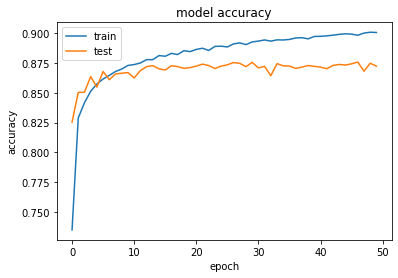

In [47]:
plt.plot(trained_model6.history['accuracy'])
plt.plot(trained_model6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

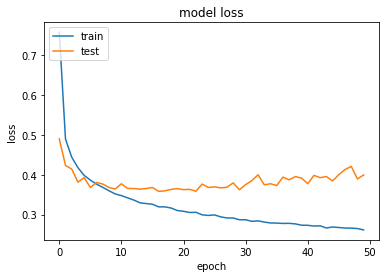

In [48]:
plt.plot(trained_model6.history['loss'])
plt.plot(trained_model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
Y_pred6=model6.predict(X_test)
Y_pred6=Y_pred6.argmax(axis=1)
print(classification_report(Y_test,Y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.84      0.77      1000
           3       0.88      0.85      0.86      1000
           4       0.77      0.79      0.78      1000
           5       0.95      0.96      0.95      1000
           6       0.73      0.60      0.66      1000
           7       0.92      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [50]:
#ada graad

In [51]:
model7=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_19 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [52]:
model7.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model7=model7.fit(X_train,Y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 1.6369 - accuracy: 0.5008 - val_loss: 1.1283 - val_accuracy: 0.6668
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9849 - accuracy: 0.6872 - val_loss: 0.8788 - val_accuracy: 0.7139
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8349 - accuracy: 0.7223 - val_loss: 0.7874 - val_accuracy: 0.7376
Epoch 4/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.7656 - accuracy: 0.7424 - val_loss: 0.7359 - val_accuracy: 0.7559
Epoch 5/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.7227 - accuracy: 0.7578 - val_loss: 0.7013 - val_accuracy: 0.7680
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6921 - accuracy: 0.7688 - val_loss: 0.6749 - val_accuracy: 0.7749
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6685 - accuracy: 0.7761 - val_loss: 0.6547 - val_accu

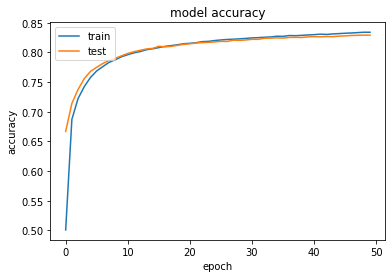

In [53]:
plt.plot(trained_model7.history['accuracy'])
plt.plot(trained_model7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

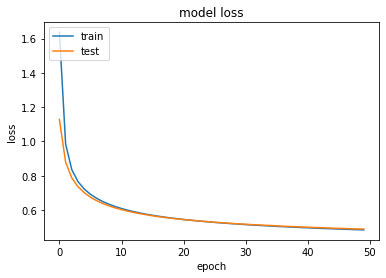

In [54]:
plt.plot(trained_model7.history['loss'])
plt.plot(trained_model7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [55]:
Y_pred7=model7.predict(X_test)
Y_pred7=Y_pred7.argmax(axis=1)
print(classification_report(Y_test,Y_pred7))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.97      0.94      0.95      1000
           2       0.71      0.70      0.70      1000
           3       0.81      0.85      0.83      1000
           4       0.71      0.75      0.73      1000
           5       0.94      0.88      0.91      1000
           6       0.59      0.52      0.56      1000
           7       0.88      0.90      0.89      1000
           8       0.92      0.94      0.93      1000
           9       0.89      0.94      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [56]:
#manipulate epochs and batch_size

In [57]:
model8=tf.keras.Sequential([
       tf.keras.layers.Dense(20,input_shape=(784,),activation="relu"),
       tf.keras.layers.Dense(40,activation="relu"),
       tf.keras.layers.Dense(10,activation="softmax")
])
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_22 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                410       
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
_________________________________________________________________


In [58]:
model8.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model8=model8.fit(X_train,Y_train,batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6016 - accuracy: 0.7905 - val_loss: 0.5000 - val_accuracy: 0.8215
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4264 - accuracy: 0.8499 - val_loss: 0.4066 - val_accuracy: 0.8595
Epoch 3/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3923 - accuracy: 0.8604 - val_loss: 0.4209 - val_accuracy: 0.8495
Epoch 4/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3725 - accuracy: 0.8654 - val_loss: 0.4071 - val_accuracy: 0.8537
Epoch 5/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3575 - accuracy: 0.8709 - val_loss: 0.3680 - val_accuracy: 0.8698
Epoch 6/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3459 - accuracy: 0.8745 - val_loss: 0.3694 - val_accuracy: 0.8711
Epoch 7/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3355 - accuracy: 0.8781 - val_loss: 0.3637 - val_acc

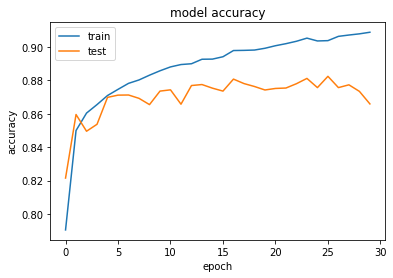

In [59]:
plt.plot(trained_model8.history['accuracy'])
plt.plot(trained_model8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

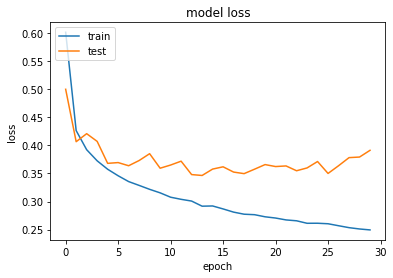

In [60]:
plt.plot(trained_model8.history['loss'])
plt.plot(trained_model8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [61]:
Y_pred8=model8.predict(X_test)
Y_pred8=Y_pred8.argmax(axis=1)
print(classification_report(Y_test,Y_pred8))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.78      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.85      0.61      0.71      1000
           5       0.96      0.95      0.96      1000
           6       0.61      0.75      0.67      1000
           7       0.95      0.93      0.94      1000
           8       0.97      0.94      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

